In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [3]:
import cesium
from cesium import featurize

In [4]:
print(cesium.__version__)

0.9.9


In [5]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_01_Aug_2019.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [5]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
test_new.head()

row ID       longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
0   Row0  1555311120000     74.451979     19.111606     98.371549   
1   Row1  1555311060000     73.933103     18.088026     98.186038   
2   Row2  1555311000000     73.471742     25.843589     98.371549   
3   Row3  1555310940000     73.010381     27.772137     98.371549   
4   Row4  1555310880000     72.549020     18.402556     98.186038   

   AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  ...  \
0     18.819155     93.337524     69.969526     95.445534      7.802471  ...   
1     18.943335     92.869960     69.969526     95.445534     12.856953  ...   
2     33.166077     92.343799     69.969526     95.628479     21.591973  ...   
3     35.991205     91.876236     69.850105     95.607810     19.492370  ...   
4     19.591687     91.408672     69.969526     95.607810      8.014898  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
0     44.620461     22.338103     75.685755     73.945394      0.000000   
1     53.182296     26.967692     75.685755     66.649583     56.385432   
2     53.029243     26.851837     75.685755     66.587330     56.402658   
3     53.015226     26.266369     75.685755     66.373907     56.527297   
4     53.172932     26.605640     75.685755     66.529224     56.640964   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0        stringTime  \
0      0.000000      0.000000      0.000000  2019-04-15 08:52   
1     68.734584      9.127668      2.275890  2019-04-15 08:51   
2     68.853203      9.136596      2.275735  2019-04-15 08:50   
3     69.391059      9.138625      2.281882  2019-04-15 08:49   
4     69.299560      9.121256      2.269317  2019-04-15 08:48   

   correct_longtime  
0        1555311120  
1        1555311060  
2        1555311000  
3        1555310940  
4        1555310880  

[5 rows x 4222 columns]

In [8]:
# It will print the type of value of each column
long_time = test_new.correct_longtime
print(type(long_time))
string_time = test_new.stringTime
print(type(string_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [10]:
print(test_new.shape)  #ROWS, COLUMNS

(25000, 4224)


In [11]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [12]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

#RWDAKRWRS8V0
# 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

12


In [13]:
size_column = len(multivariate_column_label)
print(size_column)

12


In [14]:
multivariate_data=test_new.iloc[0:25000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [16]:
multivariate_data.head()

dateTime_column  DEWIHOBT9_I0  AEDATZ_HONP0  \
dateTime                                                              
2019-03-11 03:14:00 2019-03-11 03:14:00         100.0     97.304518   
2019-03-11 03:15:00 2019-03-11 03:15:00         100.0     96.950979   
2019-03-11 03:16:00 2019-03-11 03:16:00         100.0     96.722113   
2019-03-11 03:17:00 2019-03-11 03:17:00         100.0     96.671992   
2019-03-11 03:18:00 2019-03-11 03:18:00         100.0     96.717532   

                     AEDATZK_ASP0  AEDATZ_HO_V0  AEDATZ_TZCP2  AEDATZKA_8P0  \
dateTime                                                                      
2019-03-11 03:14:00     97.482960     46.119388     98.275765     92.911299   
2019-03-11 03:15:00     97.167113     46.534541     97.658591     92.709599   
2019-03-11 03:16:00     96.937628     46.555631     95.779320     92.519508   
2019-03-11 03:17:00     96.868238     45.940449     96.898266     92.876853   
2019-03-11 03:18:00     96.901785     44.218947     97.680386     92.997927   

                     AEDATZ_HO_P1  AEDAHO_T9_V2  RWWIHOB_HWT0  RWWIHOB_MWT0  \
dateTime                                                                      
2019-03-11 03:14:00     97.357811     83.327361     94.076290     96.594824   
2019-03-11 03:15:00     97.563494     84.314814     94.003521     96.529931   
2019-03-11 03:16:00     97.431268     84.380943     93.851567     96.404936   
2019-03-11 03:17:00     97.252133     83.279853     93.727603     96.295169   
2019-03-11 03:18:00     97.289250     79.963124     93.643636     96.264723   

                     AEWIHO_T9AV2  
dateTime                           
2019-03-11 03:14:00     79.178306  
2019-03-11 03:15:00     81.659117  
2019-03-11 03:16:00     86.055430  
2019-03-11 03:17:00     87.113691  
2019-03-11 03:18:00     87.266264

In [ ]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

In [32]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  756


In [33]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [34]:
print(multivariate_data.shape)
print(multivariate_data_modify.shape)

multivariate_data_modify.head()

(25000, 18)
(24242, 18)


DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-11 03:14:00         100.0     97.304518     97.482960     46.119388   
2019-03-11 03:15:00         100.0     96.950979     97.167113     46.534541   
2019-03-11 03:16:00         100.0     96.722113     96.937628     46.555631   
2019-03-11 03:17:00         100.0     96.671992     96.868238     45.940449   
2019-03-11 03:18:00         100.0     96.717532     96.901785     44.218947   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-11 03:14:00     98.275765     92.911299     97.357811     83.327361   
2019-03-11 03:15:00     97.658591     92.709599     97.563494     84.314814   
2019-03-11 03:16:00     95.779320     92.519508     97.431268     84.380943   
2019-03-11 03:17:00     96.898266     92.876853     97.252133     83.279853   
2019-03-11 03:18:00     97.680386     92.997927     97.289250     79.963124   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2        Date  \
dateTime                                                                    
2019-03-11 03:14:00     94.076290     96.594824     79.178306  11/03/2019   
2019-03-11 03:15:00     94.003521     96.529931     81.659117  11/03/2019   
2019-03-11 03:16:00     93.851567     96.404936     86.055430  11/03/2019   
2019-03-11 03:17:00     93.727603     96.295169     87.113691  11/03/2019   
2019-03-11 03:18:00     93.643636     96.264723     87.266264  11/03/2019   

                         Time Weekday_name  weekday TypeofDAY  \
dateTime                                                        
2019-03-11 03:14:00  03:14:00       Monday        0   Weekday   
2019-03-11 03:15:00  03:15:00       Monday        0   Weekday   
2019-03-11 03:16:00  03:16:00       Monday        0   Weekday   
2019-03-11 03:17:00  03:17:00       Monday        0   Weekday   
2019-03-11 03:18:00  03:18:00       Monday        0   Weekday   

                     TypeofDAY_number  numric_time  
dateTime                                            
2019-03-11 03:14:00                 1      11640.0  
2019-03-11 03:15:00                 1      11700.0  
2019-03-11 03:16:00                 1      11760.0  
2019-03-11 03:17:00                 1      11820.0  
2019-03-11 03:18:00                 1      11880.0

In [ ]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.legend(loc='upper left')
plt.show()

In [37]:
multivariate_data_modify = multivariate_data_modify.drop(['Date','Time','Weekday_name','weekday','TypeofDAY','TypeofDAY_number','numric_time'], axis=1)

In [38]:
multivariate_data_modify.head()

DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-11 06:00:00         100.0     97.177166     97.291490     41.065755   
2019-03-11 06:01:00         100.0     97.020823     97.203219     43.359671   
2019-03-11 06:02:00         100.0     96.975788     97.185224     44.332790   
2019-03-11 06:03:00         100.0     97.168392     97.320316     44.755227   
2019-03-11 06:04:00         100.0     97.392551     97.544565     44.507580   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-11 06:00:00     97.940932     93.150835     97.429980     72.288793   
2019-03-11 06:01:00     97.870094     93.173144     97.448278     77.459238   
2019-03-11 06:02:00     97.912693     93.263816     97.418899     79.500532   
2019-03-11 06:03:00     97.891398     93.245289     97.555245     80.792918   
2019-03-11 06:04:00     97.868120     93.167271     97.382815     80.309394   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2  
dateTime                                                       
2019-03-11 06:00:00     92.283270     94.806510     77.949226  
2019-03-11 06:01:00     92.224090     94.735201     77.951114  
2019-03-11 06:02:00     92.072937     94.611008     78.243991  
2019-03-11 06:03:00     91.976162     94.514064     83.347804  
2019-03-11 06:04:00     91.892995     94.442754     85.305147

In [35]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [36]:
print(multivariate_data_modify.shape)
print(multivariate_data_drop_zero.shape)

(24242, 18)
(12923, 18)


In [ ]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [37]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [38]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

(12923, 18)
(60640, 14)


In [39]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [40]:
print(multivariate_data_drop_zero_interpolate.shape)

(60640, 14)


In [41]:
multivariate_data_drop_zero_interpolate.head()

DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-12 00:01:00         100.0     97.659706     97.900850     50.415568   
2019-03-12 00:02:00         100.0     97.676245     97.915906     49.594916   
2019-03-12 00:03:00         100.0     97.564928     97.778770     48.591651   
2019-03-12 00:04:00         100.0     97.599656     97.790127     48.110811   
2019-03-12 00:05:00         100.0     97.745070     97.935292     47.084092   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-12 00:01:00     96.066121     93.089252     95.626245     75.463649   
2019-03-12 00:02:00     96.171131     93.094994     95.935807     75.068848   
2019-03-12 00:03:00     96.339044     93.109346     96.008232     74.879726   
2019-03-12 00:04:00     96.071072     93.073855     95.955914     75.158981   
2019-03-12 00:05:00     96.985940     93.257551     95.921884     75.074500   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2  weekday  \
dateTime                                                                 
2019-03-12 00:01:00     94.670504     96.830387     84.910029      1.0   
2019-03-12 00:02:00     94.503361     96.692570     80.273688      1.0   
2019-03-12 00:03:00     94.371401     96.601240     78.495344      1.0   
2019-03-12 00:04:00     94.009915     96.360875     78.383038      1.0   
2019-03-12 00:05:00     94.049902     96.419362     78.123191      1.0   

                     TypeofDAY_number  numric_time  
dateTime                                            
2019-03-12 00:01:00               1.0         60.0  
2019-03-12 00:02:00               1.0        120.0  
2019-03-12 00:03:00               1.0        180.0  
2019-03-12 00:04:00               1.0        240.0  
2019-03-12 00:05:00               1.0        300.0

In [ ]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [42]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+2
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDATZ_TZCP2
AEDATZKA_8P0
AEDATZ_HO_P1
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [43]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

(12923, 18)
(12911, 18)
(60628, 14)


In [44]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [45]:
new_dataframe.columns

Index(['AEDATZ_HONP0', 'AEDATZK_ASP0', 'AEDATZ_HO_V0', 'AEDATZ_TZCP2',
       'AEDATZKA_8P0', 'AEDATZ_HO_P1', 'AEDAHO_T9_V2', 'RWWIHOB_HWT0',
       'RWWIHOB_MWT0', 'AEWIHO_T9AV2', 'Date', 'Time', 'Weekday_name',
       'weekday', 'TypeofDAY', 'TypeofDAY_number', 'numric_time'],
      dtype='object')

In [49]:
new_dataframe = new_dataframe.drop(['Date', 'Time', 'Weekday_name','weekday', 'TypeofDAY', 'TypeofDAY_number', 'numric_time'], axis=1)

In [50]:
new_dataframe.columns

Index(['AEDATZ_HONP0', 'AEDATZK_ASP0', 'AEDATZ_HO_V0', 'AEDATZ_TZCP2',
       'AEDATZKA_8P0', 'AEDATZ_HO_P1', 'AEDAHO_T9_V2', 'RWWIHOB_HWT0',
       'RWWIHOB_MWT0', 'AEWIHO_T9AV2'],
      dtype='object')

In [ ]:
ex = new_dataframe.plot(subplots=True, layout=(size_column-1,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [50]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

shape of multivariate_data:  (8761, 18)
shape of multivariate_data_modify:  (8272, 11)
shape of multivariate_data_drop_zero:  (8094, 11)
shape of new_dataframe:  (8084, 10)


In [ ]:
multivariate_data_drop_zero.head()

In [51]:
new_dataframe.corr()

AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  AEDATZ_TZCP2  \
AEDATZ_HONP0      1.000000      0.985497     -0.323622      0.360693   
AEDATZK_ASP0      0.985497      1.000000     -0.220446      0.316317   
AEDATZ_HO_V0     -0.323622     -0.220446      1.000000     -0.496813   
AEDATZ_TZCP2      0.360693      0.316317     -0.496813      1.000000   
AEDATZKA_8P0      0.229899      0.241771     -0.239519      0.331556   
AEDATZ_HO_P1      0.186000      0.133372     -0.265458      0.179188   
AEDAHO_T9_V2     -0.119475     -0.056854      0.634346      0.025588   
RWWIHOB_HWT0     -0.035763     -0.011345      0.022227      0.019064   
RWWIHOB_MWT0     -0.048061     -0.009372      0.240449      0.023466   
AEWIHO_T9AV2     -0.024841      0.028312      0.486626      0.048061   

              AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  RWWIHOB_HWT0  \
AEDATZ_HONP0      0.229899      0.186000     -0.119475     -0.035763   
AEDATZK_ASP0      0.241771      0.133372     -0.056854     -0.011345   
AEDATZ_HO_V0     -0.239519     -0.265458      0.634346      0.022227   
AEDATZ_TZCP2      0.331556      0.179188      0.025588      0.019064   
AEDATZKA_8P0      1.000000     -0.005321      0.036988      0.134637   
AEDATZ_HO_P1     -0.005321      1.000000     -0.244910     -0.127920   
AEDAHO_T9_V2      0.036988     -0.244910      1.000000      0.108564   
RWWIHOB_HWT0      0.134637     -0.127920      0.108564      1.000000   
RWWIHOB_MWT0      0.047571     -0.145897      0.353230      0.612707   
AEWIHO_T9AV2      0.032755     -0.153658      0.780895     -0.146044   

              RWWIHOB_MWT0  AEWIHO_T9AV2  
AEDATZ_HONP0     -0.048061     -0.024841  
AEDATZK_ASP0     -0.009372      0.028312  
AEDATZ_HO_V0      0.240449      0.486626  
AEDATZ_TZCP2      0.023466      0.048061  
AEDATZKA_8P0      0.047571      0.032755  
AEDATZ_HO_P1     -0.145897     -0.153658  
AEDAHO_T9_V2      0.353230      0.780895  
RWWIHOB_HWT0      0.612707     -0.146044  
RWWIHOB_MWT0      1.000000      0.142414  
AEWIHO_T9AV2      0.142414      1.000000

In [52]:
new_dataframe_1 = new_dataframe.drop(['AEDATZ_HONP0','AEDATZK_ASP0','RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [53]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
dataset=np.array(new_dataframe_1)

In [54]:
new_dataframe_1.head()

AEDATZ_HO_V0  AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  \
dateTime                                                                      
2019-03-12 09:40:00     42.195534     97.831463     93.155009     97.358322   
2019-03-12 00:01:00     50.415568     96.066121     93.089252     95.626245   
2019-03-12 00:02:00     49.594916     96.171131     93.094994     95.935807   
2019-03-12 00:03:00     48.591651     96.339044     93.109346     96.008232   
2019-03-12 00:04:00     48.110811     96.071072     93.073855     95.955914   

                     AEDAHO_T9_V2  AEWIHO_T9AV2  
dateTime                                         
2019-03-12 09:40:00     75.241023     78.782245  
2019-03-12 00:01:00     75.463649     84.910029  
2019-03-12 00:02:00     75.068848     80.273688  
2019-03-12 00:03:00     74.879726     78.495344  
2019-03-12 00:04:00     75.158981     78.383038

In [55]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.95)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  12265
dataset length:  12911
train_input shape:  (12265, 5)
train_output shape:  (12265,)
test_input shape:  (646, 5)
test_output shape:  (646,)


In [57]:
new_dataframe_1.describe()

AEDATZ_HO_V0  AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
count  12911.000000  12911.000000  12911.000000  12911.000000  12911.000000   
mean      42.134655     96.527563     93.851110     96.327715     70.605920   
std        4.916171      1.032257      1.527783      1.498181      7.065707   
min       25.095394     92.683038     90.768145     83.306091     34.757063   
25%       39.249686     95.858827     92.569482     94.585073     67.311446   
50%       41.550803     96.807125     93.160876     97.128668     71.352561   
75%       44.364120     97.307404     95.306642     97.378429     74.796401   
max       67.611019     99.181223    100.000000     99.954889     99.451639   

       AEWIHO_T9AV2  
count  12911.000000  
mean      77.306310  
std        4.291434  
min       64.938342  
25%       75.170662  
50%       76.872405  
75%       78.242576  
max       99.037058

# Linear Regression

In [78]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [137]:
# train_model=LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
# print(train_model)
train_model = ExtraTreesRegressor(n_estimators=100, random_state=0)
train_model.fit(train_input, train_output)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)

In [138]:
predicted_output=train_model.predict(test_input)

In [139]:
print('test_input size: ',test_input.size)
print('test_output size: ',test_output.size)
print('predicted output size: ',predicted_output.size)

print('test_input shape: ',test_input.shape)
print('test_output shape: ',test_output.shape)
print('predicted output shape: ',predicted_output.shape)

test_input size:  3230
test_output size:  646
predicted output size:  646
test_input shape:  (646, 5)
test_output shape:  (646,)
predicted output shape:  (646,)


In [140]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [141]:
# print('Slope:' ,train_model.coef_)
# print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.63
Mean_absolute_error: 4.76
Mean squared error: 43.50
RMSE:  6.595672902097829


In [135]:
print(min(predicted_output))
print(max(predicted_output))

68.44311375361777
91.347297722411


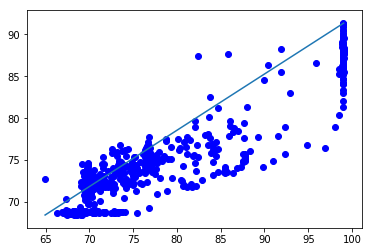

In [136]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)))
plt.scatter(test_output,predicted_output, color = 'blue')

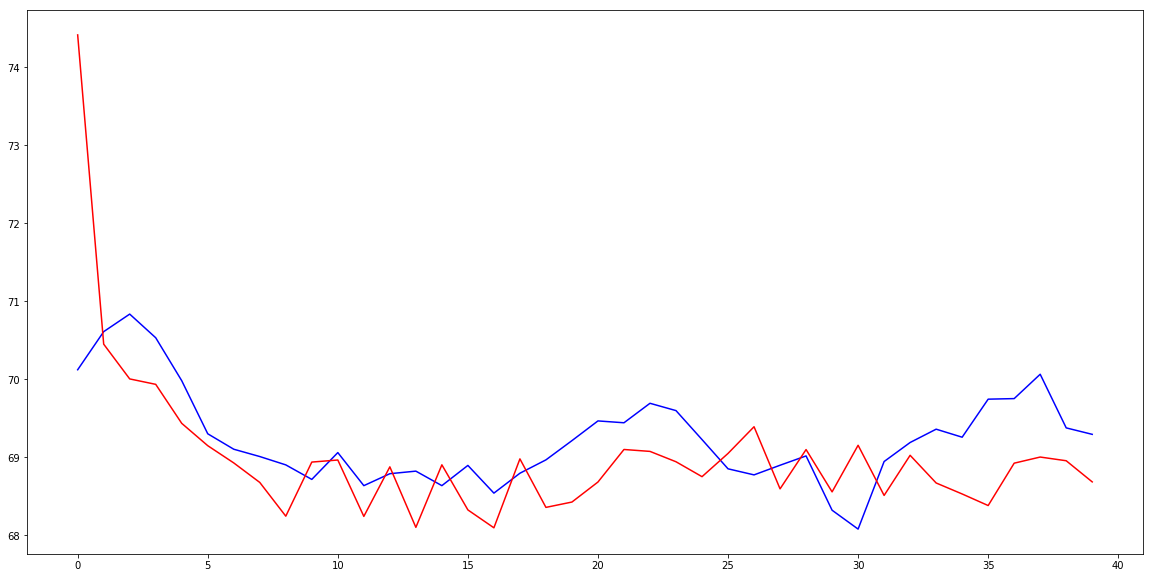

In [66]:
plt.plot(predicted_output[90:130], color = 'blue')
plt.plot(test_output[90:130], color = 'red')

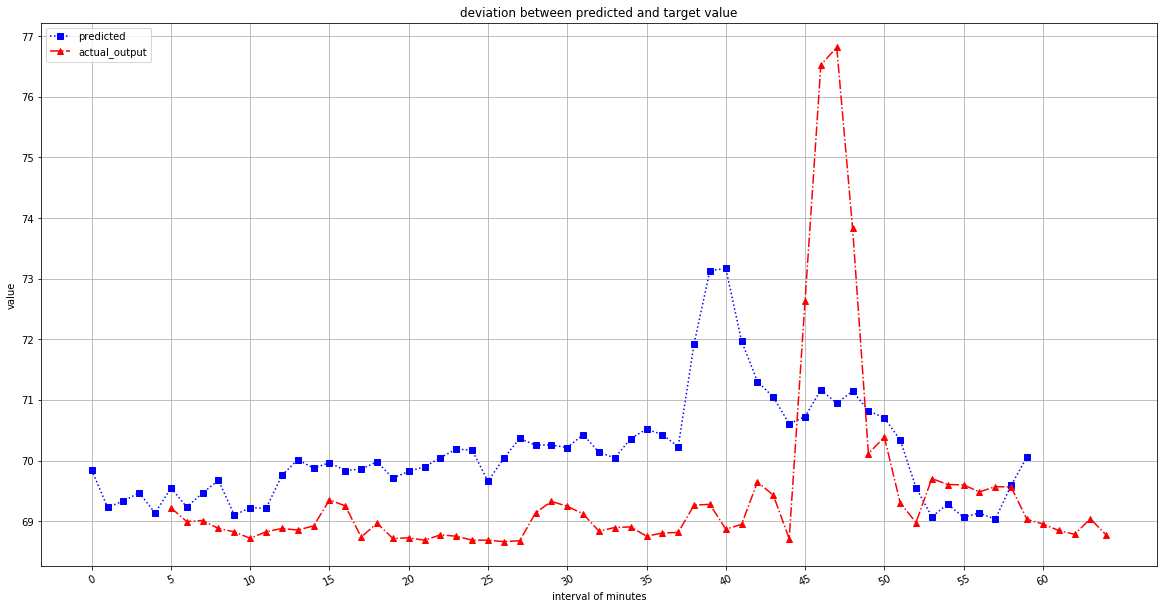

In [63]:
actual_data = range(65)

plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

<class 'numpy.ndarray'>


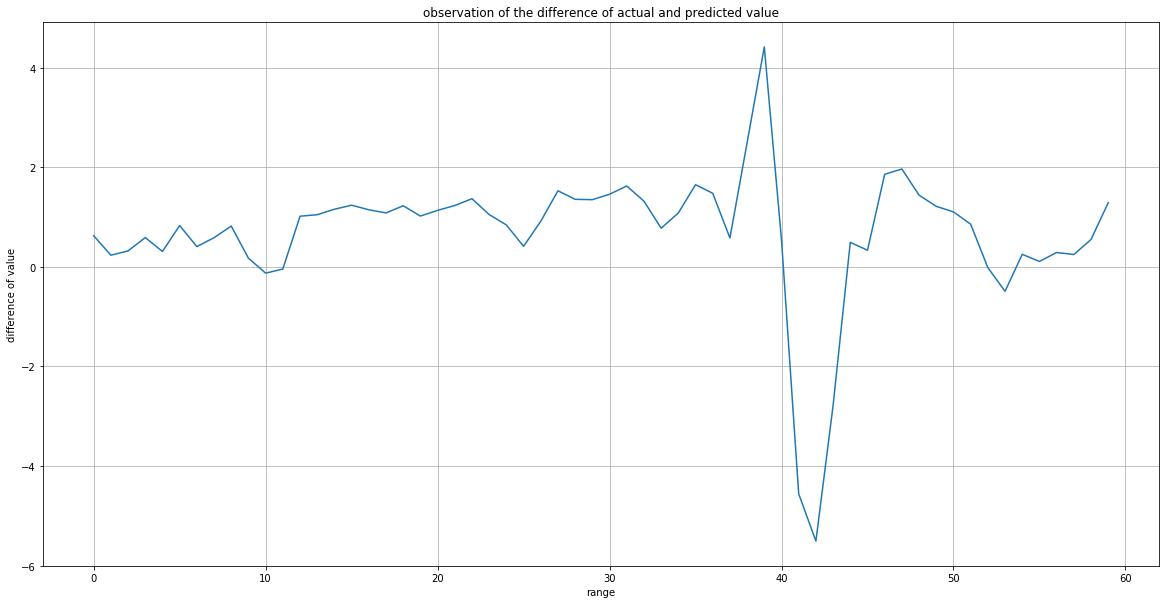

In [75]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

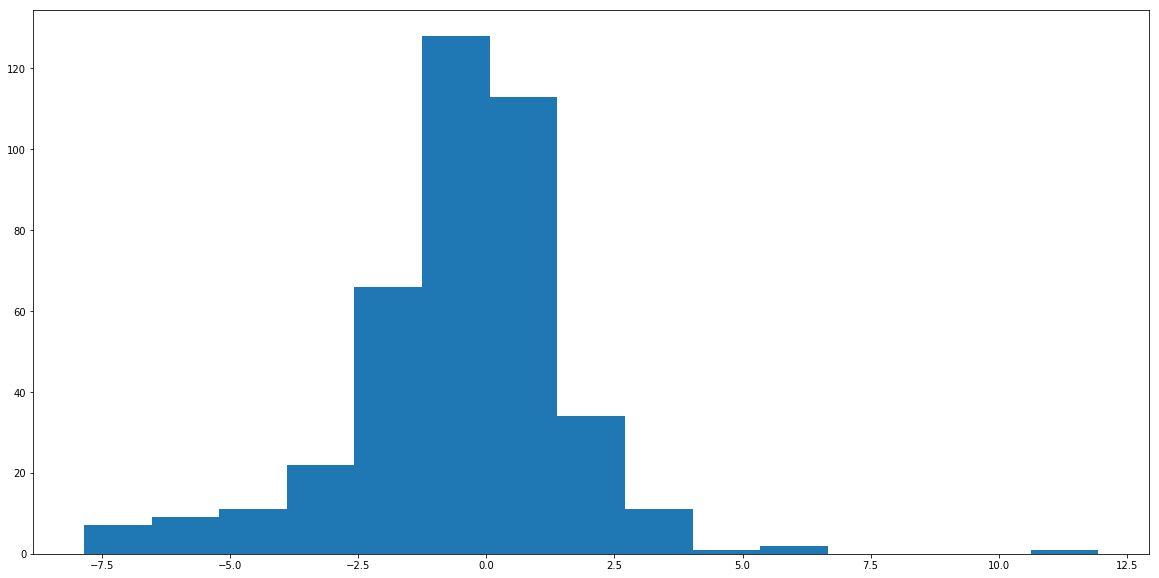

In [67]:
plt.hist(difference_of_value, bins=15)
# plt.xlim(-10,10,1)
plt.show()

In [68]:
print(test_output.shape)
print(predicted_output.shape)

test_output_mean = np.mean(test_output)
print(test_output_mean)

length_predicted_output = len(predicted_output)
print(length_predicted_output)

m = 0

for i in predicted_output:
    n = i - test_output_mean
    n = n**2
    m = n+m
variance_pred_wrt_test = m / length_predicted_output


std_pred_wrt_test = math.sqrt(variance_pred_wrt_test)

print(std_pred_wrt_test)

(405,)
(405,)
72.62750832288604
405
2.5785188718512773


min : 67.3420787718636  and max:  85.29885491380395
min : 65.19969298000237  and max:  83.2104848579333


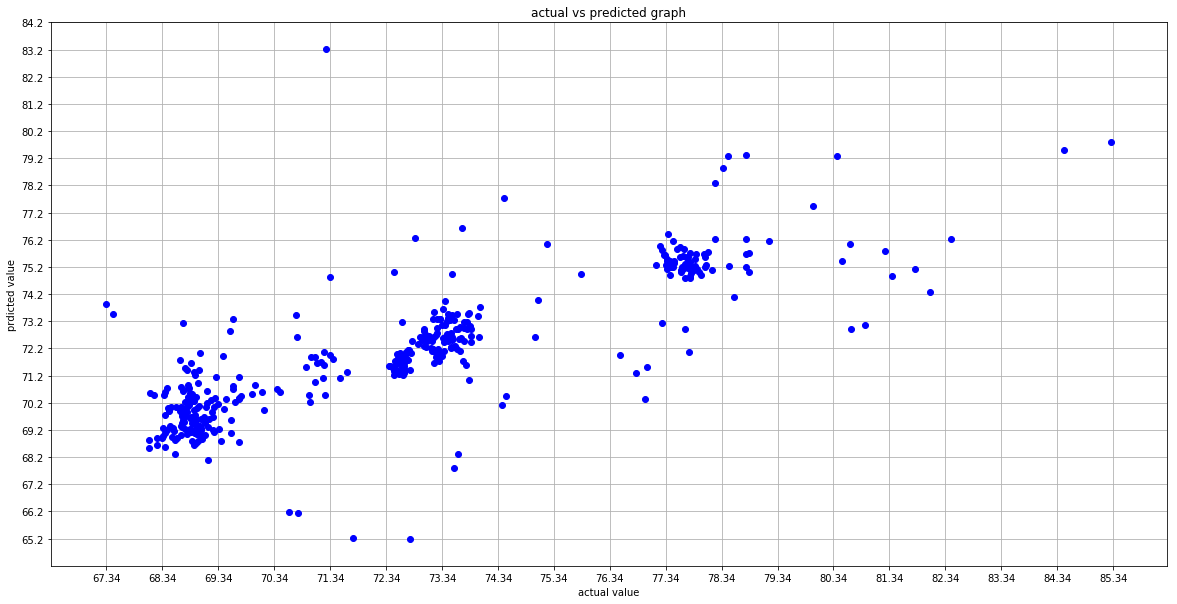

In [69]:
low = 0
high = len(predicted_output)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))

plt.plot(test_output[low:high], predicted_output[low:high], 'bo')
# plt.plot(predicted_output[low:high],test_output[low:high], 'bo')

plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')

plt.show()

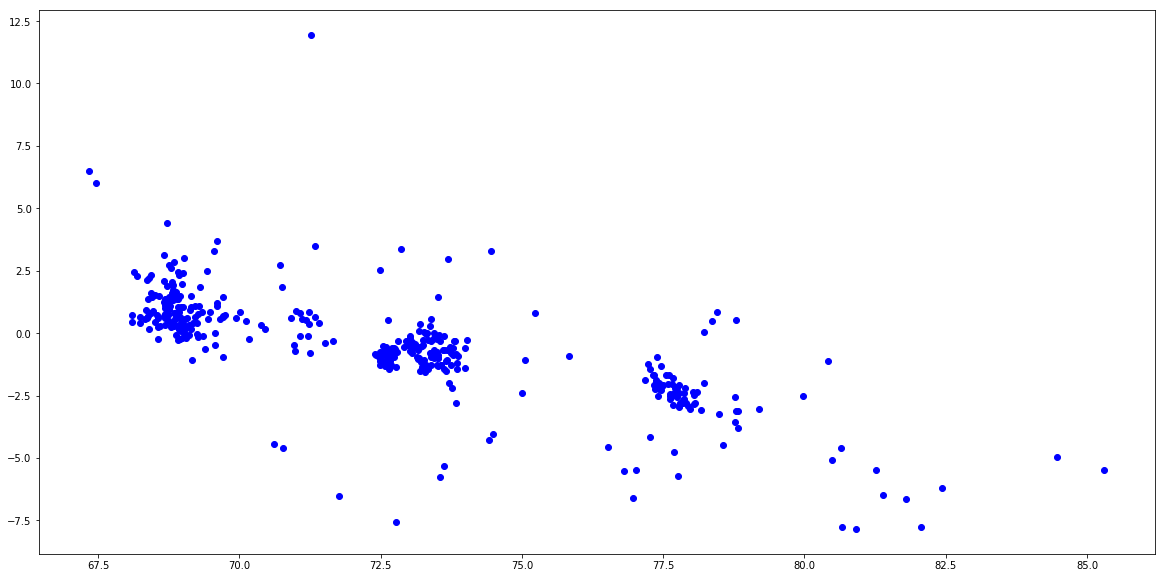

In [70]:
# graph actual vs error

low_1 = 0
high_1 = len(test_output)

plt.plot(test_output[low:high], difference_of_value[low:high], 'bo')

In [ ]:
plt.scatter(range(0, len(test_output)),test_output)
plt.show()
plt.scatter(range(0, len(predicted_output)),predicted_output)
plt.show()

In [ ]:
low = 100
high = 500

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(test_output[low:high]-1), max(test_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual value graph')

plt.show()

In [ ]:
low = 0
high = 500

print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(predicted_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted value graph')

plt.show()

# polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
model = model.fit(train_input, train_output)

In [ ]:
predicted_output_polynomial = model.predict(test_input)

In [ ]:
%matplotlib qt

actual_data = range(65)


plt.plot(predicted_output_polynomial[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted output','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_polynomial))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_polynomial))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_polynomial))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_polynomial))
print('RMSE: ',RMSE)

In [ ]:
val = []
val = np.array(val)
for i in range (0,len(test_output)):
    val_1 = predicted_output[i] - test_output[i]
#     print(val)
    val = np.append(val, val_1)
    i+=1

In [ ]:
val.shape

In [ ]:
plt.plot(val)
plt.show()

In [ ]:
# plt.plot(difference_of_value)
# plt.show()

In [ ]:
# new_val = difference_of_value - val

In [ ]:
# new_val.shape

In [ ]:
# plt.plot(new_val)
# plt.show()

In [ ]:
from sklearn import linear_model
x = [1,2,3,4,5]
x=np.array(x)
y = [2,4,5,4,5]
y=np.array(y)


x_1 = np.reshape(x, (-1, 1))
y_1 = np.reshape(y, (-1, 1))

In [ ]:
y_1

In [ ]:
# my_reg = linear_model.LinearRegression(fit_intercept=True, normalize=False)
my_reg = LinearRegression(fit_intercept=True, normalize=False)

my_reg.fit(x_1,y_1)

In [ ]:
my_reg

In [ ]:
print('Slope:' ,my_reg.coef_)
print('Intercept:', my_reg.intercept_)

In [ ]:
pred_y = my_reg.predict(x_1)

In [ ]:
plt.scatter(x_1, y_1)
plt.plot(x_1,pred_y, color='red')
plt.show()

In [ ]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [ ]:
# clf.fit(train_input, train_output)
clf.fit(x_1, y_1)

In [ ]:
print('Slope:' ,clf.coef_)
print('Intercept:', clf.intercept_)

In [ ]:
pred_y_SGD = clf.predict(test_input)

In [ ]:
plt.plot(test_output, color = 'black')
plt.plot(pred_y_SGD, color='red')
plt.show()

In [ ]:
pred_y_SGD_reshape = np.reshape(pred_y_SGD, (-1, 1))
test_output_reshape = np.reshape(test_output, (-1, 1))
print(pred_y_SGD_reshape.shape)
print(test_output_reshape.shape)
print(test_input.shape)

In [ ]:
clf.score(test_output_reshape, pred_y_SGD_reshape)

In [ ]:
test_input